Initial attempt at saving the image from ChromeDino so that we can then try and make use of the game environment

In [1]:
import re
import time
import requests
from bs4 import BeautifulSoup
#from tqdm import tqdm, tnrange
import numpy as np
from collections import defaultdict,Counter
from scipy.misc import imread, imsave

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

import pandas as pd
import base64
import io
from PIL import Image

from matplotlib import pyplot as plt, rcParams
from matplotlib import cm
%matplotlib inline
rcParams["figure.figsize"] = (16,12)    # Use this line to increase your figure size (optional).

# Option 2
Force Selenium to execute JavaScript to just pull the information out of the canvas tag.

In [ ]:
def get_cactus_height(x,y, img):
    while np.any(img[x,y-7:y+7]):
        x -= 1
    return x

def find_cacti(img):
    height,width = np.shape(img)
    dino = img[height//2:,:height//2]
    vision = round(height*.8)
    bird_vision = round(height*0.6)
    field = img[vision,height//2 - width//30 - 5:] + img[bird_vision,height//2 - width//30 - 5:]
    distance = []
    cacti_width = []
    cacti_height = []
    prev_pixel = field[0]
    cur_dist = 0
    cur_width = 0
    for i,pixel in enumerate(field):
        if prev_pixel == 0 and pixel != 0:
            distance.append(cur_dist)
            cacti_height.append(get_cactus_height(vision, height//2 - width//30 - 5 + i, img))
            cur_dist = 0
        if prev_pixel != 0 and pixel == 0:
            cacti_width.append(cur_width)
            cur_width = 0
        if pixel == 0:
            cur_dist += 1
        else:
            cur_width += 1
        prev_pixel = pixel
    cacti_width = cacti_width[1:]
    return distance, cacti_width, cacti_height
    #print(img[vision,-height//2 - width//30 - 5:])

js_call = "return document.getElementsByClassName('runner-canvas')[0].toDataURL('image/png').substring(21);"
second_js = "Runner.instance_.tRex.startJump({})"
cur_speed_js = "return Runner.instance_.currentSpeed"
url = "https://chromedino.com/"
browser = webdriver.Chrome()
try:
    browser.get(url)

    body = browser.find_element_by_id('t')
    body.send_keys(Keys.ARROW_UP)
    prev_dist = None
    prev_width = None
    values = []
    while True:
        time.sleep(.0015)
        b64_image = browser.execute_script(js_call)
        image = base64.b64decode(b64_image)
        buf = io.BytesIO(image)
        img = Image.open(buf).convert('LA')
        np_img = np.array(img)[:,:,0]
        distances, widths, heights = find_cacti(np_img)
        print(distances, heights)
        #print(distances,widths)
        if len(values) > 70:
            if values[-1] == distances and values[-2] == distances and values[-3] == distances and values[-20] == distances:
                print("GAME OVER")
                cur_speed = float(browser.execute_script(cur_speed_js))
                browser.execute_script(second_js.format(cur_speed*3))
                values.append((-1,"NEW"))
            elif len(distances) != 0:
                distances_copy = distances.copy()
                for i,v in enumerate(distances_copy):
                    try:
                        if abs(distances_copy[i+1] - v) < 10:
                            distances.remove(v)
                        else:
                            break
                    except:
                        pass
                if 85 <= heights[0] <= 95:
                    if distances[0] < 102:
                        values.append((distances,widths,"J"))
                        cur_speed = float(browser.execute_script(cur_speed_js))
                        browser.execute_script(second_js.format(cur_speed*3))
                if 95 <= heights[0] <= 103:
                    if distances[0] < 113:
                        values.append((distances,widths,"J"))
                        cur_speed = float(browser.execute_script(cur_speed_js))
                        browser.execute_script(second_js.format(cur_speed*3))
                if 104 <= heights[0]:
                    if distances[0] < 116:
                        values.append((distances,widths,"J"))
                        cur_speed = float(browser.execute_script(cur_speed_js))
                        browser.execute_script(second_js.format(cur_speed*3))
            else:
                values.append((distances,widths,"N"))
        else:
            values.append((distances,widths,"N"))
        prev_dist, prev_width = distances, widths
except Exception as e:
    print("Errored out at step 1", e)
finally:
    browser.close() #make sure we close it when we are finished.

[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] [

[350] [105]
[337] [105]
[324] [105]
[311] [105]
[298] [105]
[285] [105]
[272] [105]
[259] [105]
[247] [105]
[232] [105]
[220] [105]
[207] [105]
[194] [105]
[181] [105]
[168] [105]
[155] [105]
[141] [105]
[129] [105]
[116] [105]
[103] [105]
[90] [105]
[73] [105]
[70] [105]
[57] [105]
[44] [105]
[31] [105]
[18] [105]
[5] [105]
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[513] [91]
[508] [91]
[494] [91]
[482] [91]
[470] [91]
[457] [91]
[444] [91]
[431] [91]
[418] [91]
[405] [91]
[392] [91]
[379] [91]
[366] [91]
[353] [91]
[340] [91]
[327] [91]
[314] [91]
[301] [91]
[287] [91]
[274] [91]
[261] [91]
[248] [91]
[235] [91]
[222] [91]
[209] [91]
[196] [91]
[183] [91]
[170] [91]
[157] [91]
[144, 353] [91, 91]
[131, 353] [91, 91]
[118, 353] [91, 91]
[105, 353] [91, 91]
[92, 353] [91, 91]
[79, 353] [91, 91]
[62, 353] [91, 91]
[53, 353] [91, 91]
[40, 353] [91, 91]
[27, 353] [91, 91]
[14, 353] [91, 91]
[1, 353] [91, 91]
[353] [91]
[347] [91]
[334] [91]
[320] [91]
[307] [91]
[294] [91]
[279] [91]
[264

In [89]:
find_cacti(np_img)

In [22]:
def find_bird(img):
    plt.imshow(img, cmap=cm.gray)

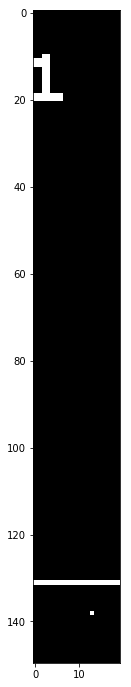

In [28]:
find_bird(bird_img[:,-20:])